## read data & data preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_excel("data_for_classification.xlsx")
df.head()

,فكرة المشروع,دراسة مرجعية,دراسة تحليلية,تصميم,برمجة,إدارة,GITHUB,اختبارات,النتائج,القيمة المضافة,التقرير,العرض
0,6,4,5,9,8,4,5,7,6,7,4,6
1,8,4,4,10,7,7,8,5,8,5,7,8
2,8,6,7,10,8,4,5,8,5,8,4,7
3,6,5,4,10,9,5,6,7,5,6,4,6
4,8,4,7,6,8,6,7,4,5,4,4,6


In [3]:
df["مجموع"]=0

for i in range(len(df)):
    value = df.iloc[i].tolist()
    df.loc[i,"مجموع"] = sum(value)

df.head()

,فكرة المشروع,دراسة مرجعية,دراسة تحليلية,تصميم,برمجة,إدارة,GITHUB,اختبارات,النتائج,القيمة المضافة,التقرير,العرض,مجموع
0,6,4,5,9,8,4,5,7,6,7,4,6,71
1,8,4,4,10,7,7,8,5,8,5,7,8,81
2,8,6,7,10,8,4,5,8,5,8,4,7,80
3,6,5,4,10,9,5,6,7,5,6,4,6,73
4,8,4,7,6,8,6,7,4,5,4,4,6,69


In [4]:
df['تصنيف']=1
for i in range(df['تصنيف'].count()):
    if df.iloc[i,12]<30:
        df.iloc[i,13]="أحمر"
    elif (df.iloc[i,12] >=40) & (df.iloc[i,12]<70):
        df.iloc[i,13]="برتقالي"
    elif (df.iloc[i,12] >=70):
        df.iloc[i,13]="أخضر"

df.head()

,فكرة المشروع,دراسة مرجعية,دراسة تحليلية,تصميم,برمجة,إدارة,GITHUB,اختبارات,النتائج,القيمة المضافة,التقرير,العرض,مجموع,تصنيف
0,6,4,5,9,8,4,5,7,6,7,4,6,71,أخضر
1,8,4,4,10,7,7,8,5,8,5,7,8,81,أخضر
2,8,6,7,10,8,4,5,8,5,8,4,7,80,أخضر
3,6,5,4,10,9,5,6,7,5,6,4,6,73,أخضر
4,8,4,7,6,8,6,7,4,5,4,4,6,69,برتقالي


In [5]:
df.describe()

,فكرة المشروع,دراسة مرجعية,دراسة تحليلية,تصميم,برمجة,إدارة,GITHUB,اختبارات,النتائج,القيمة المضافة,التقرير,العرض,مجموع
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,6.997600,4.009600,3.945600,4.986800,4.994800,3.994800,3.947200,4.008800,4.008800,3.978400,3.945200,3.958800,52.776400
std,1.000197,2.500242,2.536694,3.088955,3.115422,2.516447,2.501143,2.494957,2.470944,2.496483,2.495253,2.557444,17.931197
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,36.000000
50%,6.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,53.000000
75%,8.000000,6.000000,6.000000,8.000000,8.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,69.000000
max,8.000000,8.000000,8.000000,10.000000,10.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,90.000000


In [6]:
print("\nnumber of samples : " , df.count().max())
print(df.columns)


number of samples :  2500
Index(['فكرة المشروع', 'دراسة مرجعية', 'دراسة تحليلية', 'تصميم', 'برمجة',
       'إدارة', 'GITHUB', 'اختبارات', 'النتائج', 'القيمة المضافة', 'التقرير',
       'العرض', 'مجموع', 'تصنيف'],
      dtype='object')


### Duplicate check

In [7]:
print("number of duplicate row: ",df.duplicated().sum())

number of duplicate row:  0


### data embalance check

In [8]:
print("The number of samples in the class 'red' : " , df['تصنيف'][df['تصنيف'] == "أحمر"].count())
print("The number of samples in the class 'orange' : " , df['تصنيف'][df['تصنيف'] == "برتقالي"].count())
print("The number of samples in the class 'green' : " , df['تصنيف'][df['تصنيف'] == "أخضر"].count())

import plotly.express as px

colors = {"red":df['تصنيف'][df['تصنيف'] == "أحمر"].count(), "orange":df['تصنيف'][df['تصنيف'] == "برتقالي"].count(), "green":df['تصنيف'][df['تصنيف'] == "أخضر"].count()}
sorted_colors = dict(sorted(colors.items(), key=lambda x: x[1], reverse=True))

fig = px.pie(values=list(sorted_colors.values()), names=list(sorted_colors.keys()), width=700, height=400, color_discrete_sequence=list(sorted_colors.keys()), title="Marks distribute")

fig.show()

The number of samples in the class 'red' :  304
The number of samples in the class 'orange' :  1161
The number of samples in the class 'green' :  618


### checking for outliers

In [9]:
numerical_columns = list(df.loc[:,['فكرة المشروع', 'دراسة مرجعية', 'دراسة تحليلية', 'تصميم', 'برمجة',
       'إدارة', 'GITHUB', 'اختبارات', 'النتائج', 'القيمة المضافة', 'التقرير',
       'العرض']])

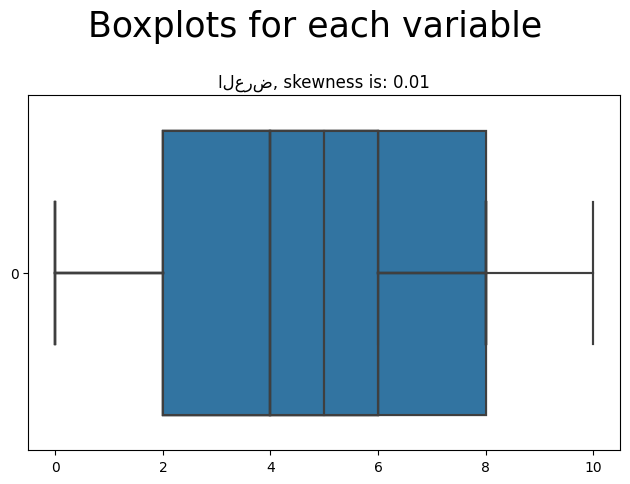

In [10]:
# checking boxplots
fig, axs = plt.subplots(1, 1, sharey=True)
fig.suptitle('Boxplots for each variable', y=1, size=25)

for i, data in enumerate(numerical_columns):
    sns.boxplot(data=df[data], orient='h', ax=axs)
    axs.set_title(data + ', skewness is: ' + str(round(df[data].skew(axis=0, skipna=True), 2)))

plt.tight_layout()

In [11]:
from collections import Counter
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
         # selecting observations containing more than x outliers
        outlier_list = Counter(outlier_list)        
        multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
        
        # Calculate the number of records below and above lower and above bound value respectively
        out1 = df[df[column] < Q1 - outlier_step]
        out2 = df[df[column] > Q3 + outlier_step]
        
        print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
        return multiple_outliers

In [12]:
# detecting outliers
Outliers_IQR = IQR_method(df,1,numerical_columns)

# dropping outliers
df = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 0


In [13]:
df.shape

(2500, 14)

### imputaion  missing

In [14]:
df.isna().sum()

فكرة المشروع      0
دراسة مرجعية      0
دراسة تحليلية     0
تصميم             0
برمجة             0
إدارة             0
GITHUB            0
اختبارات          0
النتائج           0
القيمة المضافة    0
التقرير           0
العرض             0
مجموع             0
تصنيف             0
dtype: int64

### data_split

In [15]:
from sklearn.model_selection import train_test_split

df=df.drop(['مجموع'],axis=1)

x=df.drop(['تصنيف'],axis=1)
y=df['تصنيف']

x_train ,x_test ,y_train ,y_test = train_test_split(x,y, test_size=0.3,shuffle=True, random_state=42)
x_train, x_test = x_train.reset_index(drop=True), x_test.reset_index(drop=True)
y_train, y_test = y_train.reset_index(drop=True), y_test.reset_index(drop=True)

## building and evaluation models

### import libraris

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import confusion_matrix ,recall_score, precision_score, f1_score, accuracy_score, classification_report
from yellowbrick.classifier import ROCAUC

##############################################################################################

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

##############################################################################################

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

##############################################################################################

### confusion matrix

In [17]:
def confusion_matrix_plot(cm):
    classes = ['class 1', 'class 2' , 'class 3' ]
    with np.errstate(divide='ignore', invalid='ignore'):
        cm = cm/np.sum(cm,axis=0)
    tick_marks = np.arange(3)
    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Dark2)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            text = ax.text(j, i, np.around(cm[i, j],decimals=2),
                        ha="center", va="center", color="w")
    plt.title('Normalized confusion matrix for model')
    fig.colorbar(im)
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes);

### sensitivy and specifity

In [18]:
def sensitivity_specificity(cm):
    sensitivity = []
    specificity = []

    for i in range(len(cm)):
        true_positive = cm[i, i]
        false_positive = cm[:, i].sum() - true_positive
        false_negative = cm[i, :].sum() - true_positive
        true_negative = cm.sum() - (true_positive + false_positive + false_negative)

        sensitivity.append(true_positive / (true_positive + false_negative))
        specificity.append(true_negative / (true_negative + false_positive))

    print("Sensitivity for each class:", sensitivity)
    print("Specificity for each class:", specificity)
    for i in range(len(sensitivity)):
        print("Sensitivity for each class: ",i," is", sensitivity[i])
        print("Specificity for each class:",i," is", specificity[i])

### AUC (ROC PLOT)

In [19]:
def plot_ROC_curve(model, x_train, y_train, x_test, y_test):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={"أحمر": 'أحمر', 
                                        "برتقالي": 'برتقالي', 
                                        "أخضر": 'أخضر',
})
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(x_train, y_train)
    visualizer.score(x_test, y_test)
    visualizer.show()
    
    return visualizer

### plot table score

In [20]:
def table_score(ypred):
    Recall = recall_score(y_test, ypred, average='macro' , zero_division=1)
    Precision = precision_score(y_test, ypred, average='macro' , zero_division=1)
    f1 = f1_score(y_test, ypred, average='macro' , zero_division=1)
    accuracy = accuracy_score(y_test, ypred)
    ndf = [(Recall, Precision, f1, accuracy)]

    score = pd.DataFrame(data=ndf, columns=['Recall', 'Precision', 'F1 Score', 'Accuracy'])
    return score

### KNN model

In [21]:
knn1 = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
knn1.fit(x_train , y_train)
print("Test score: {:.2f}".format(knn1.score(x_test , y_test)))

TypeError: '<' not supported between instances of 'int' and 'str'

In [ ]:
param_grid_knn = {
    'n_neighbors': [1, 10 , 100], 
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean' , 'cosine' , 'manhattan' , 'minkowski']
}
clf_knn = GridSearchCV(estimator= KNeighborsClassifier(), param_grid= param_grid_knn , cv=kfold, scoring='accuracy', verbose=3)
clf_knn.fit(x_train, y_train)

In [ ]:
print("Best of Hyper Parameter :" , clf_knn.best_params_, "\nScore : " , clf_knn.best_score_)

In [ ]:
knn2 = clf_knn.best_estimator_.fit(x_train,y_train)
print("Test score for test_data: {:.2f}".format(knn2.score(x_test, y_test)))
print("Test score for train_data: {:.2f}".format(knn2.score(x_train, y_train)))

In [ ]:
# kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores_clf1 = cross_val_score(knn2, x_train, y_train, cv=kfold, scoring='accuracy')
print(scores_clf1)
print("Mean for k_fold cross validation for KNN model", np.mean(scores_clf1))

In [ ]:
ypred1 = knn2.predict(x_test)
cm_knn = confusion_matrix(y_test, ypred1)
print("confusion_matrix(ytest, ypred): \n", cm_knn)

In [ ]:
sensitivity_specificity(cm_knn)

In [ ]:
confusion_matrix_plot(cm_knn)

In [ ]:
print("Classification Report:\n", classification_report(y_test, ypred1 , zero_division=1))

In [ ]:
plot_ROC_curve(knn2, x_train, y_train, x_test, y_test)

In [ ]:
knn_score = table_score(ypred1)
knn_score.insert(0, 'Model', 'KNN')
knn_score


### logistic regresion model

In [ ]:
lr = LogisticRegression(multi_class="ovr")
lr.fit(x_train, y_train)
print("Test score: {:.2f}".format(lr.score(x_test , y_test)))

In [ ]:
param_grid_lr = { 
    'multi_class': ['auto' , 'ovr'] ,
    'solver': ['lbfgs' , 'liblinear'], 
    'C': [1, 2 , 4]
}
clf_lr = GridSearchCV(estimator= LogisticRegression() , param_grid= param_grid_lr , cv=kfold, scoring='accuracy', verbose=3)
clf_lr.fit(x_train, y_train)

In [ ]:
print("Best of Hyper Parameter :" , clf_lr.best_params_, "\nScore : " , clf_lr.best_score_)

In [ ]:
lr2 = clf_lr.best_estimator_.fit(x_train,y_train)
print("Test score for test_data: {:.2f}".format(lr2.score(x_test, y_test)))
print("Test score for train_data: {:.2f}".format(lr2.score(x_train, y_train)))

In [ ]:
scores_clf2 = cross_val_score(lr2, x_train, y_train, cv=kfold, scoring='accuracy')
print(scores_clf2)
print("Mean for k_fold cross validation for Logistic Regression model", np.mean(scores_clf2))

In [ ]:
ypred2 = lr2.predict(x_test)
cm_lr = confusion_matrix(y_test, ypred2)
print("confusion_matrix(ytest, ypred): \n", cm_lr)

In [ ]:
sensitivity_specificity(cm_lr)

In [ ]:
confusion_matrix_plot(cm_lr)

In [ ]:
print("Classification Report:\n", classification_report(y_test, ypred2 , zero_division=1))

In [ ]:
plot_ROC_curve(lr2, x_train, y_train, x_test, y_test)

In [ ]:
lr_score = table_score(ypred2)
lr_score.insert(0, 'Model', 'LR')
lr_score

### SVM model

In [ ]:
svm = SVC(decision_function_shape='ovo')
svm.fit(x_train , y_train)
print("Test score: {:.2f}".format(svm.score(x_test , y_test)))

In [ ]:
param_grid_svm = { 
    'decision_function_shape': ['ovo' , 'ovr'],
    'kernel': ['rbf' , 'poly'], 
    'C': [1, 2 , 4 , 6]
}
clf_svm = GridSearchCV(estimator= SVC() , param_grid= param_grid_svm , cv=kfold, scoring='accuracy', verbose=3)
clf_svm.fit(x_train, y_train)

In [ ]:
print("Best of Hyper Parameter :" , clf_svm.best_params_, "\nScore : " , clf_svm.best_score_)

In [ ]:
svm2 = clf_svm.best_estimator_.fit(x_train,y_train)
print("Test score for test_data: {:.2f}".format(svm2.score(x_test, y_test)))
print("Test score for train_data: {:.2f}".format(svm2.score(x_train, y_train)))

In [ ]:
scores_clf3 = cross_val_score(svm2, x_train, y_train, cv=kfold, scoring='accuracy')
print(scores_clf3)
print("Mean for k_fold cross validation for SVM model", np.mean(scores_clf3))

In [ ]:
ypred3 = svm2.predict(x_test)
cm_svm = confusion_matrix(y_test, ypred3)
print("confusion_matrix(ytest, ypred): \n", cm_svm)

In [ ]:
sensitivity_specificity(cm_svm)

In [ ]:
confusion_matrix_plot(cm_svm)

In [ ]:
print("Classification Report:\n", classification_report(y_test, ypred3 , zero_division=1))

In [ ]:
plot_ROC_curve(svm2, x_train, y_train, x_test, y_test)
# print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

In [ ]:
svm_score = table_score(ypred3)
svm_score.insert(0, 'Model', 'SVM')
svm_score

### Random forest model

In [ ]:
RF = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=2) #criterion can be also : entropy 
RF.fit(x_train, y_train)
print("Test score: {:.2f}".format(RF.score(x_test , y_test)))

In [ ]:
param_grid_RF = { 
    'criterion': ['gini' , 'entropy'],
    'n_estimators': [100, 200, 300],
    'max_depth': [2 , 4 , 8]
}
clf_RF = GridSearchCV(estimator= RandomForestClassifier() , param_grid= param_grid_RF , cv=kfold, scoring='accuracy', verbose=3)
clf_RF.fit(x_train, y_train)

In [ ]:
print("Best of Hyper Parameter :" , clf_RF.best_params_, "\nScore : " , clf_RF.best_score_)

In [ ]:
RF2 = clf_RF.best_estimator_.fit(x_train,y_train)
print("Test score for test_data: {:.2f}".format(RF2.score(x_test, y_test)))
print("Test score for train_data: {:.2f}".format(RF2.score(x_train, y_train)))

In [ ]:
scores_clf4 = cross_val_score(RF2, x_train, y_train, cv=kfold, scoring='accuracy')
print(scores_clf4)
print("Mean for k_fold cross validation for Random Forest model", np.mean(scores_clf4))

In [ ]:
ypred4 = RF2.predict(x_test)
cm_rf = confusion_matrix(y_test, ypred4)
print("confusion_matrix(ytest, ypred): \n", cm_rf)

In [ ]:
sensitivity_specificity(cm_rf)

In [ ]:
confusion_matrix_plot(cm_rf)

In [ ]:
print("Classification Report:\n", classification_report(y_test, ypred4, zero_division=1))

In [ ]:
plot_ROC_curve(RF2, x_train, y_train, x_test, y_test)

In [ ]:
rf_score = table_score(ypred4)
rf_score.insert(0, 'Model', 'RF')
rf_score

### Naive Bayes

In [ ]:
NB = GaussianNB()
NB.fit(x_train, y_train)
print("Test score: {:.2f}".format(NB.score(x_test , y_test)))

In [ ]:
param_grid_NB = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
}
clf_NB = GridSearchCV(estimator= GaussianNB() , param_grid= param_grid_NB , cv=kfold, scoring='accuracy', verbose=3)
clf_NB.fit(x_train, y_train)

In [ ]:
print("Best of Hyper Parameter :" , clf_NB.best_params_, "\nScore : " , clf_NB.best_score_)

In [ ]:
NB2 = clf_NB.best_estimator_.fit(x_train,y_train)
print("Test score for test_data: {:.2f}".format(NB2.score(x_test, y_test)))
print("Test score for train_data: {:.2f}".format(NB2.score(x_train, y_train)))

In [ ]:
scores_clf5 = cross_val_score(NB2, x_train, y_train, cv=kfold, scoring='accuracy')
print(scores_clf5)
print("Mean for k_fold cross validation for Naive Bayes model", np.mean(scores_clf5))

In [ ]:
ypred5 = NB2.predict(x_test)
cm_NB = confusion_matrix(y_test, ypred5)
print("confusion_matrix(ytest, ypred): \n", cm_NB)

In [ ]:
sensitivity_specificity(cm_NB)

In [ ]:
confusion_matrix_plot(cm_NB)

In [ ]:
print("Classification Report:\n", classification_report(y_test, ypred5, zero_division=1))

In [ ]:
plot_ROC_curve(NB2, x_train, y_train, x_test, y_test)

In [ ]:
nb_score = table_score(ypred5)
nb_score.insert(0, 'Model', 'NB')
nb_score

### NN model

In [ ]:
MLP = MLPClassifier(activation='tanh',solver='sgd', hidden_layer_sizes=(5,), max_iter=5000, random_state=1)
MLP.fit(x_train,y_train)
print("Test score: {:.2f}".format(MLP.score(x_test, y_test)))

In [ ]:
param_grid_MLP = {
    'learning_rate_init': [0.001 , 0.01], 
    'batch_size': [1]
    # 'hidden_layer_sizes': [(20,), (50, 50)],
    # 'activation': ['relu', 'tanh'],
    # 'alpha': [0.0001, 0.01],
}
clf_MLP = GridSearchCV(estimator=MLPClassifier(), param_grid= param_grid_MLP , cv=kfold, scoring='accuracy' , verbose=3)
clf_MLP.fit(x_train, y_train)

In [ ]:
print("Best of Hyper Parameter :" , clf_MLP.best_params_, "\nScore : " , clf_MLP.best_score_)

In [ ]:
MLP2 = clf_MLP.best_estimator_.fit(x_train,y_train)
print("Test score for test_data: {:.2f}".format(MLP2.score(x_test, y_test)))
print("Test score for train_data: {:.2f}".format(MLP2.score(x_train, y_train)))

In [ ]:
scores_clf6 = cross_val_score(MLP2, x_train, y_train, cv=kfold, scoring='accuracy')
print(scores_clf6)
print("Mean for k_fold cross validation for Neural Network model", np.mean(scores_clf6))

In [ ]:
ypred6 = MLP2.predict(x_test)
cm_MLP = confusion_matrix(y_test, ypred6)
print("confusion_matrix(ytest, ypred): \n", cm_MLP)

In [ ]:
sensitivity_specificity(cm_MLP)

In [ ]:
confusion_matrix_plot(cm_MLP)

In [ ]:
print("Classification Report:\n", classification_report(y_test, ypred6, zero_division=1))

In [ ]:
plot_ROC_curve(MLP2, x_train, y_train, x_test, y_test)

In [ ]:
nn_score = table_score(ypred6)
nn_score.insert(0, 'Model', 'NN')
nn_score

### comparison

In [ ]:
predictions = pd.concat([knn_score, lr_score, svm_score, rf_score, nb_score, nn_score], ignore_index=True, sort=False)
predictions.sort_values(by=['Accuracy'], ascending=False)

### visualization

In [ ]:
labels = ['naive_bayes Regression', 'random_forest ','knn','logistic regressio','SVM','NN']
data = [scores_clf1, scores_clf2,scores_clf3,scores_clf4,scores_clf5,scores_clf6]

plt.figure(figsize=(10, 6))
plt.boxplot(data)
plt.title('Comparison of Cross-Validation Scores')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 7), labels)
plt.grid(axis='y')

# Calculate and display mean scores
mean_scores = [np.mean(scores_clf1), np.mean(scores_clf2),np.mean(scores_clf3),np.mean(scores_clf4),np.mean(scores_clf5),np.mean(scores_clf6)]
for i, mean in enumerate(mean_scores, 1):
    plt.text(i, mean, f'Mean: {mean:.4f}', ha='center', va='bottom', color='blue')

plt.show()

### :
x_pred = pd.read_excel("data_for_test_model_by_dr_yasser.xlsx")
for i in x_pred.columns:
    x_pred[i] = x_pred[i].apply(eval)

mean_values_per_feature_x_pred = x_pred.apply(lambda row: [np.mean(row[i]) for i in x_pred.columns], axis=1)

x_pred = pd.DataFrame(mean_values_per_feature_x_pred.tolist(), columns=x_pred.columns,index=x_pred.index)
x_pred['متوسط'] = x_pred.apply(lambda row: np.mean(row), axis=1)

print("Original DataFrame:")
print(x_pred)# ***********************************
x_pred=x_pred.iloc[0,:]
ypred1 = knn2.predict(x_pred) 
print(ypred1)
ypred2 = lr2.predict(x_pred)
print(ypred2)
ypred3 = svm2.predict(x_pred)
print(ypred3)
ypred4 = RF2.predict(x_pred)
print(ypred4)
ypred5 = NB2.predict(x_pred)
print(ypred5)
ypred6 = MLP2.predict(x_pred)
print(ypred6)



In [ ]:
pred_scale = pd.read_excel("data_for_test_model_by_dr_yasser.xlsx") 
for i in pred_scale.columns:
    pred_scale[i] = pred_scale[i].apply(eval)
pred_scale

In [ ]:
pred_scale["مجموع"] = 0

for i in range(len(pred_scale)):
    value = pred_scale.iloc[i].tolist()
    pred_scale.loc[i,"مجموع"] = sum(value)

pred_scale.head()

In [ ]:
pred_scale = pred_scale.apply(lambda x: x.astype(int))
print(pred_scale.dtypes)

In [ ]:
pred_scale['تصنيف']=1
for i in range(pred_scale['تصنيف'].count()):
    if pred_scale.iloc[i,12]<50:
        pred_scale.iloc[i,13]="أحمر"
    elif (pred_scale.iloc[i,12] >=50) & (pred_scale.iloc[i,12]<60):
        pred_scale.iloc[i,13]="برتقالي"
    elif (pred_scale.iloc[i,12] >=60):
        pred_scale.iloc[i,13]="أخضر"

pred_scale.head()

In [ ]:
x_pred_scale=pred_scale.drop(['تصنيف','مجموع'],axis=1)
y_pred_scale=pred_scale['تصنيف']

# **********************************************************************************************************
def table_score_2(ypred,y_pred_test=y_pred_scale):
    y_pred_test=y_pred_scale
    Recall = recall_score(y_pred_test, ypred, average='macro' , zero_division=1)
    Precision = precision_score(y_pred_test, ypred, average='macro' , zero_division=1)
    f1 = f1_score(y_pred_test, ypred, average='macro' , zero_division=1)
    accuracy = accuracy_score(y_pred_test, ypred)
    ndf = [(Recall, Precision, f1, accuracy)]

    score = pd.DataFrame(data=ndf, columns=['Recall', 'Precision', 'F1 Score', 'Accuracy'])
    return score
# **********************************************************************************************************

ypred_1_scale = knn2.predict(x_pred_scale) 
knn_score = table_score_2(ypred_1_scale)
knn_score.insert(0, 'Model', 'knn')

ypred_2_scale = lr2.predict(x_pred_scale) 
lr_score = table_score_2(ypred_2_scale)
lr_score.insert(0, 'Model', 'lr')

ypred_3_scale = svm2.predict(x_pred_scale) 
svm_score = table_score_2(ypred_3_scale)
svm_score.insert(0, 'Model', 'svm')

ypred_4_scale = RF2.predict(x_pred_scale) 
RF_score = table_score_2(ypred_4_scale)
RF_score.insert(0, 'Model', 'RF')

ypred_5_scale = NB2.predict(x_pred_scale) 
NB_score = table_score_2(ypred_5_scale)
NB_score.insert(0, 'Model', 'NB')

ypred_6_scale = MLP2.predict(x_pred_scale) 
NN_score = table_score_2(ypred_6_scale)
NN_score.insert(0, 'Model', 'NN')

# comparising table
predictions_for_test = pd.concat([knn_score, lr_score, svm_score, RF_score, NB_score, NN_score], ignore_index=True, sort=False)
predictions_for_test.sort_values(by=['Accuracy'], ascending=False)

## Save Model

In [ ]:
import joblib

filename = 'model.joblib'

In [ ]:
# joblib.dump(knn2, filename)